In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df = df.drop(["Id"], axis = 1)

In [2]:
df.drop_duplicates = True 

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info 

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()
# Noice. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

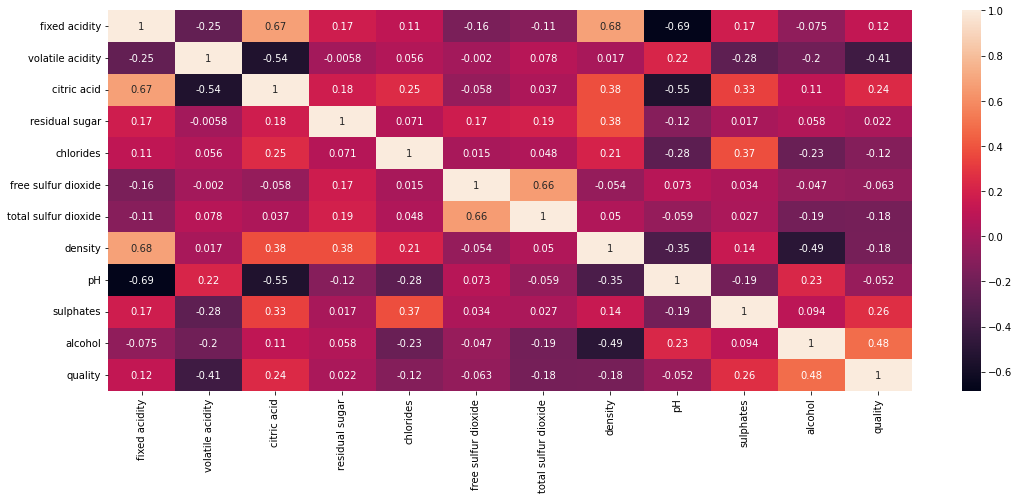

In [8]:
plt.figure(figsize=[18,7])

sns.heatmap(df.corr(),annot=True)
plt.show()

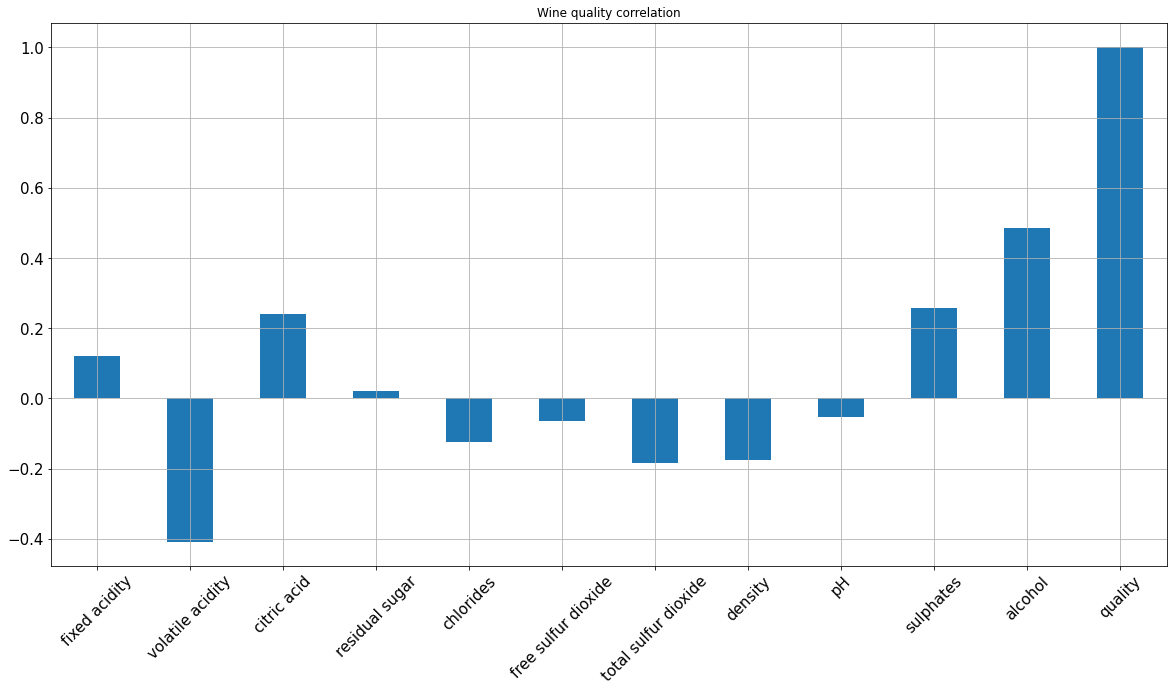

In [9]:
# This is quite a well-balanced dataset. I could get a good 80%+ using the top five important features,
# but for now I think it would be best to turn the project into a binary classification problem. 

df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Wine quality correlation", fontsize = 15,
        rot = 45, grid = True)
plt.show()

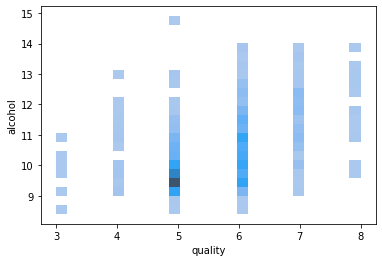

In [10]:
sns.histplot(x = df["quality"], y = df["alcohol"])
plt.show()

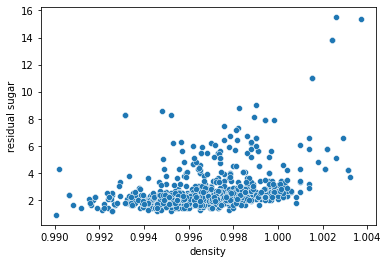

In [11]:
sns.scatterplot(x = df["density"], y = df["residual sugar"])
plt.show()

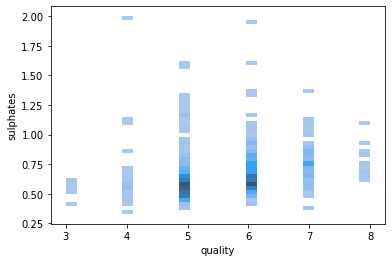

In [12]:
sns.histplot(x = df["quality"], y = df["sulphates"])
plt.show()

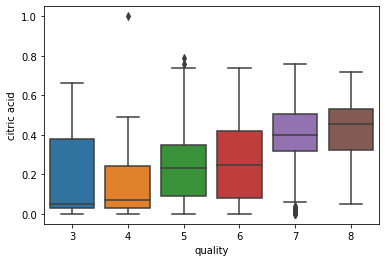

In [13]:
sns.boxplot(x = df["quality"], y = df["citric acid"])

plt.show()

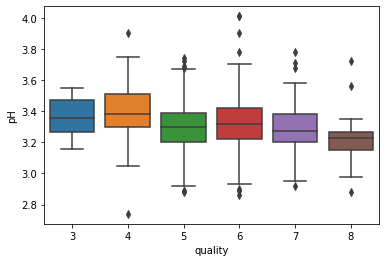

In [14]:
sns.boxplot(x = df["quality"], y = df["pH"])

plt.show()

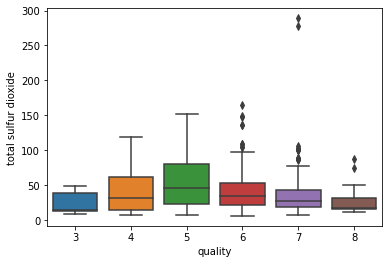

In [15]:
sns.boxplot(x = df["quality"], y = df["total sulfur dioxide"])

plt.show()

In [16]:
df["top quality"] = [0 if x < 7 else 1 for x in df["quality"]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,top quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [17]:
df["top quality"].groupby(df["top quality"]).count()

top quality
0    984
1    159
Name: top quality, dtype: int64

In [18]:
y = df["top quality"]
X = df.drop(["top quality", "quality"], axis=1)

In [19]:
features_label = X.columns[:12]


classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importance = classifier.feature_importances_
indices = np. argsort(importance)[::-1]

for x in range(X.shape[1]):
    print ("%2d) %-*s %f" % (x + 1, 30, features_label[x],importance[indices[x]]))

 1) fixed acidity                  0.172098
 2) volatile acidity               0.129480
 3) citric acid                    0.110414
 4) residual sugar                 0.107643
 5) chlorides                      0.089611
 6) free sulfur dioxide            0.082461
 7) total sulfur dioxide           0.069876
 8) density                        0.066127
 9) pH                             0.059940
10) sulphates                      0.057241
11) alcohol                        0.055107


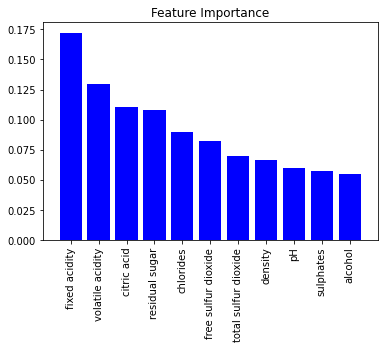

In [20]:
plt.title('Feature Importance')
plt.bar(range(X.shape[1]),importance[indices], color= "blue", align= "center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [22]:
scaler = MinMaxScaler()

normalised_fit = scaler.fit(X_train)
scaled_X_train = normalised_fit.transform(X_train)
scaled_X_test = normalised_fit.transform(X_test)

In [23]:
models = [('LR', LogisticRegression(solver='liblinear')), 
         ('LDA', LinearDiscriminantAnalysis()),
         ('KNN', KNeighborsClassifier()),
         ('CART', DecisionTreeClassifier()),
         ('NB', GaussianNB()),
         ('SVM', SVC(gamma='auto'))]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits= 10, random_state= 7, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring= "accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {round(cv_results.mean() * 100)}% | std: {cv_results.std()}")
 

LR: 87% | std: 0.026100766272276383
LDA: 86% | std: 0.026487025125521365
KNN: 84% | std: 0.03411836015989044
CART: 84% | std: 0.04077376607575024
NB: 82% | std: 0.04873397172404482
SVM: 88% | std: 0.01807104036850118
